## House Price Prediction with Linear Regression

1. Importing necessary packages

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


2.  Load and Clean the Dataset

In [4]:
# Load dataset
df = pd.read_csv("Housing.csv")

# Show basic info
print(df.info())

# Drop rows with missing values
df = df.dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


3. Train-test-split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

4. Evaluation Metrics

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R²: 0.65


5. Save the model

In [7]:
import joblib

joblib.dump(model, "house_price_model.pkl")
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl


6. Plots


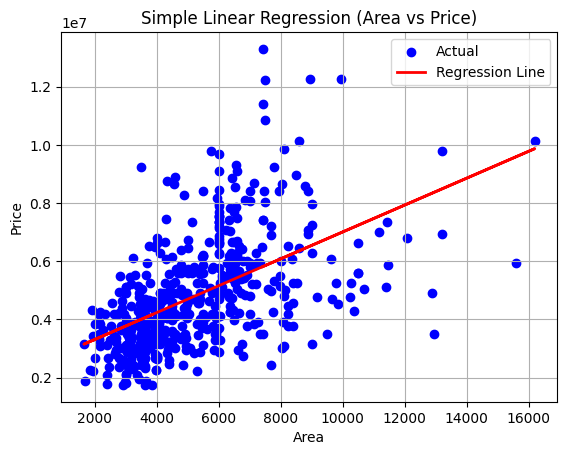

In [8]:
X_simple = df[['area']]
y_simple = df['price']

simple_model = LinearRegression()
simple_model.fit(X_simple, y_simple)

y_simple_pred = simple_model.predict(X_simple)

plt.scatter(X_simple, y_simple, color='blue', label='Actual')
plt.plot(X_simple, y_simple_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression (Area vs Price)")
plt.legend()
plt.grid(True)
plt.show()


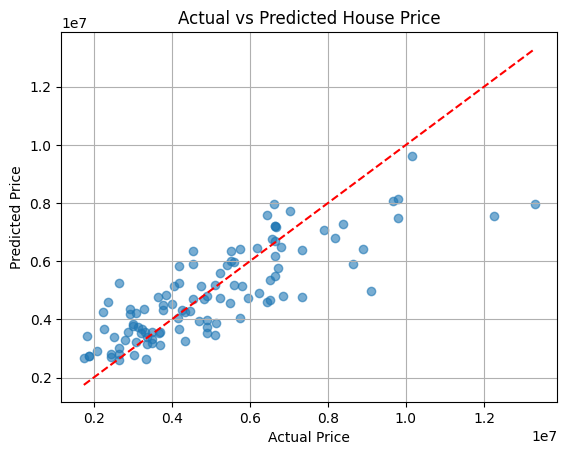

In [9]:

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.grid(True)
plt.show()



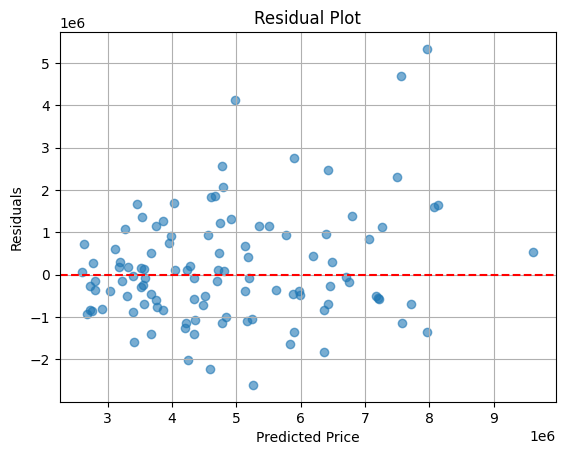

In [10]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
